In [3]:
# make imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

## Load files

In [3]:
#load files
df = pd.read_csv('data.csv')
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [44]:
df.shape
dg = df.columns.tolist()
dg

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [5]:
#find null Values in the data set

df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
# Impuing Null values

from sklearn.impute import SimpleImputer 
imp_mod = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')

df_imputed = pd.DataFrame(imp_mod.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [8]:
# Finding Unique values in the columns

for i in df_imputed.columns:
    print("************************************************",i,"***************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************ id ***************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 2

In [9]:
df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=="ckd\t"  else x)

df_imputed["cad"]=df_imputed["cad"].apply(lambda x:'no' if x=="\tno"  else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=="\tno"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=="\tyes"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x==" yes"  else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x==" \t?"  else x)

# replaced values with column mode
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x==" \t6200"  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x==" \t8400"  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x==" \t"  else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x==" \t43"  else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x==" \t"  else x)

Axes(0.125,0.11;0.775x0.77)


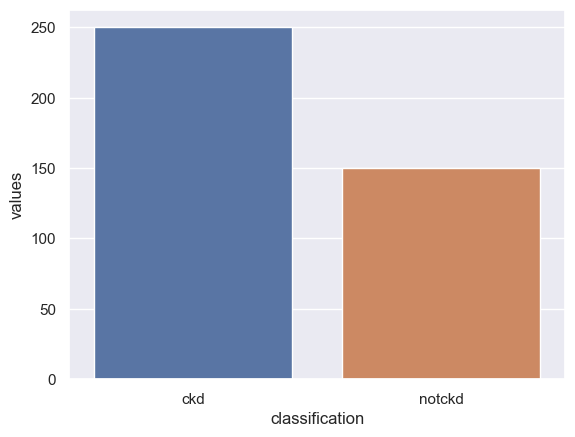

In [10]:
#Check Label Imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df_imputed["classification"].value_counts()
temp_df= pd.DataFrame({'classification': temp.index,'values': temp.values})
print(sns.barplot(x = 'classification', y="values", data=temp_df))

In [11]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [12]:
# fixing data types

df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [13]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [14]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

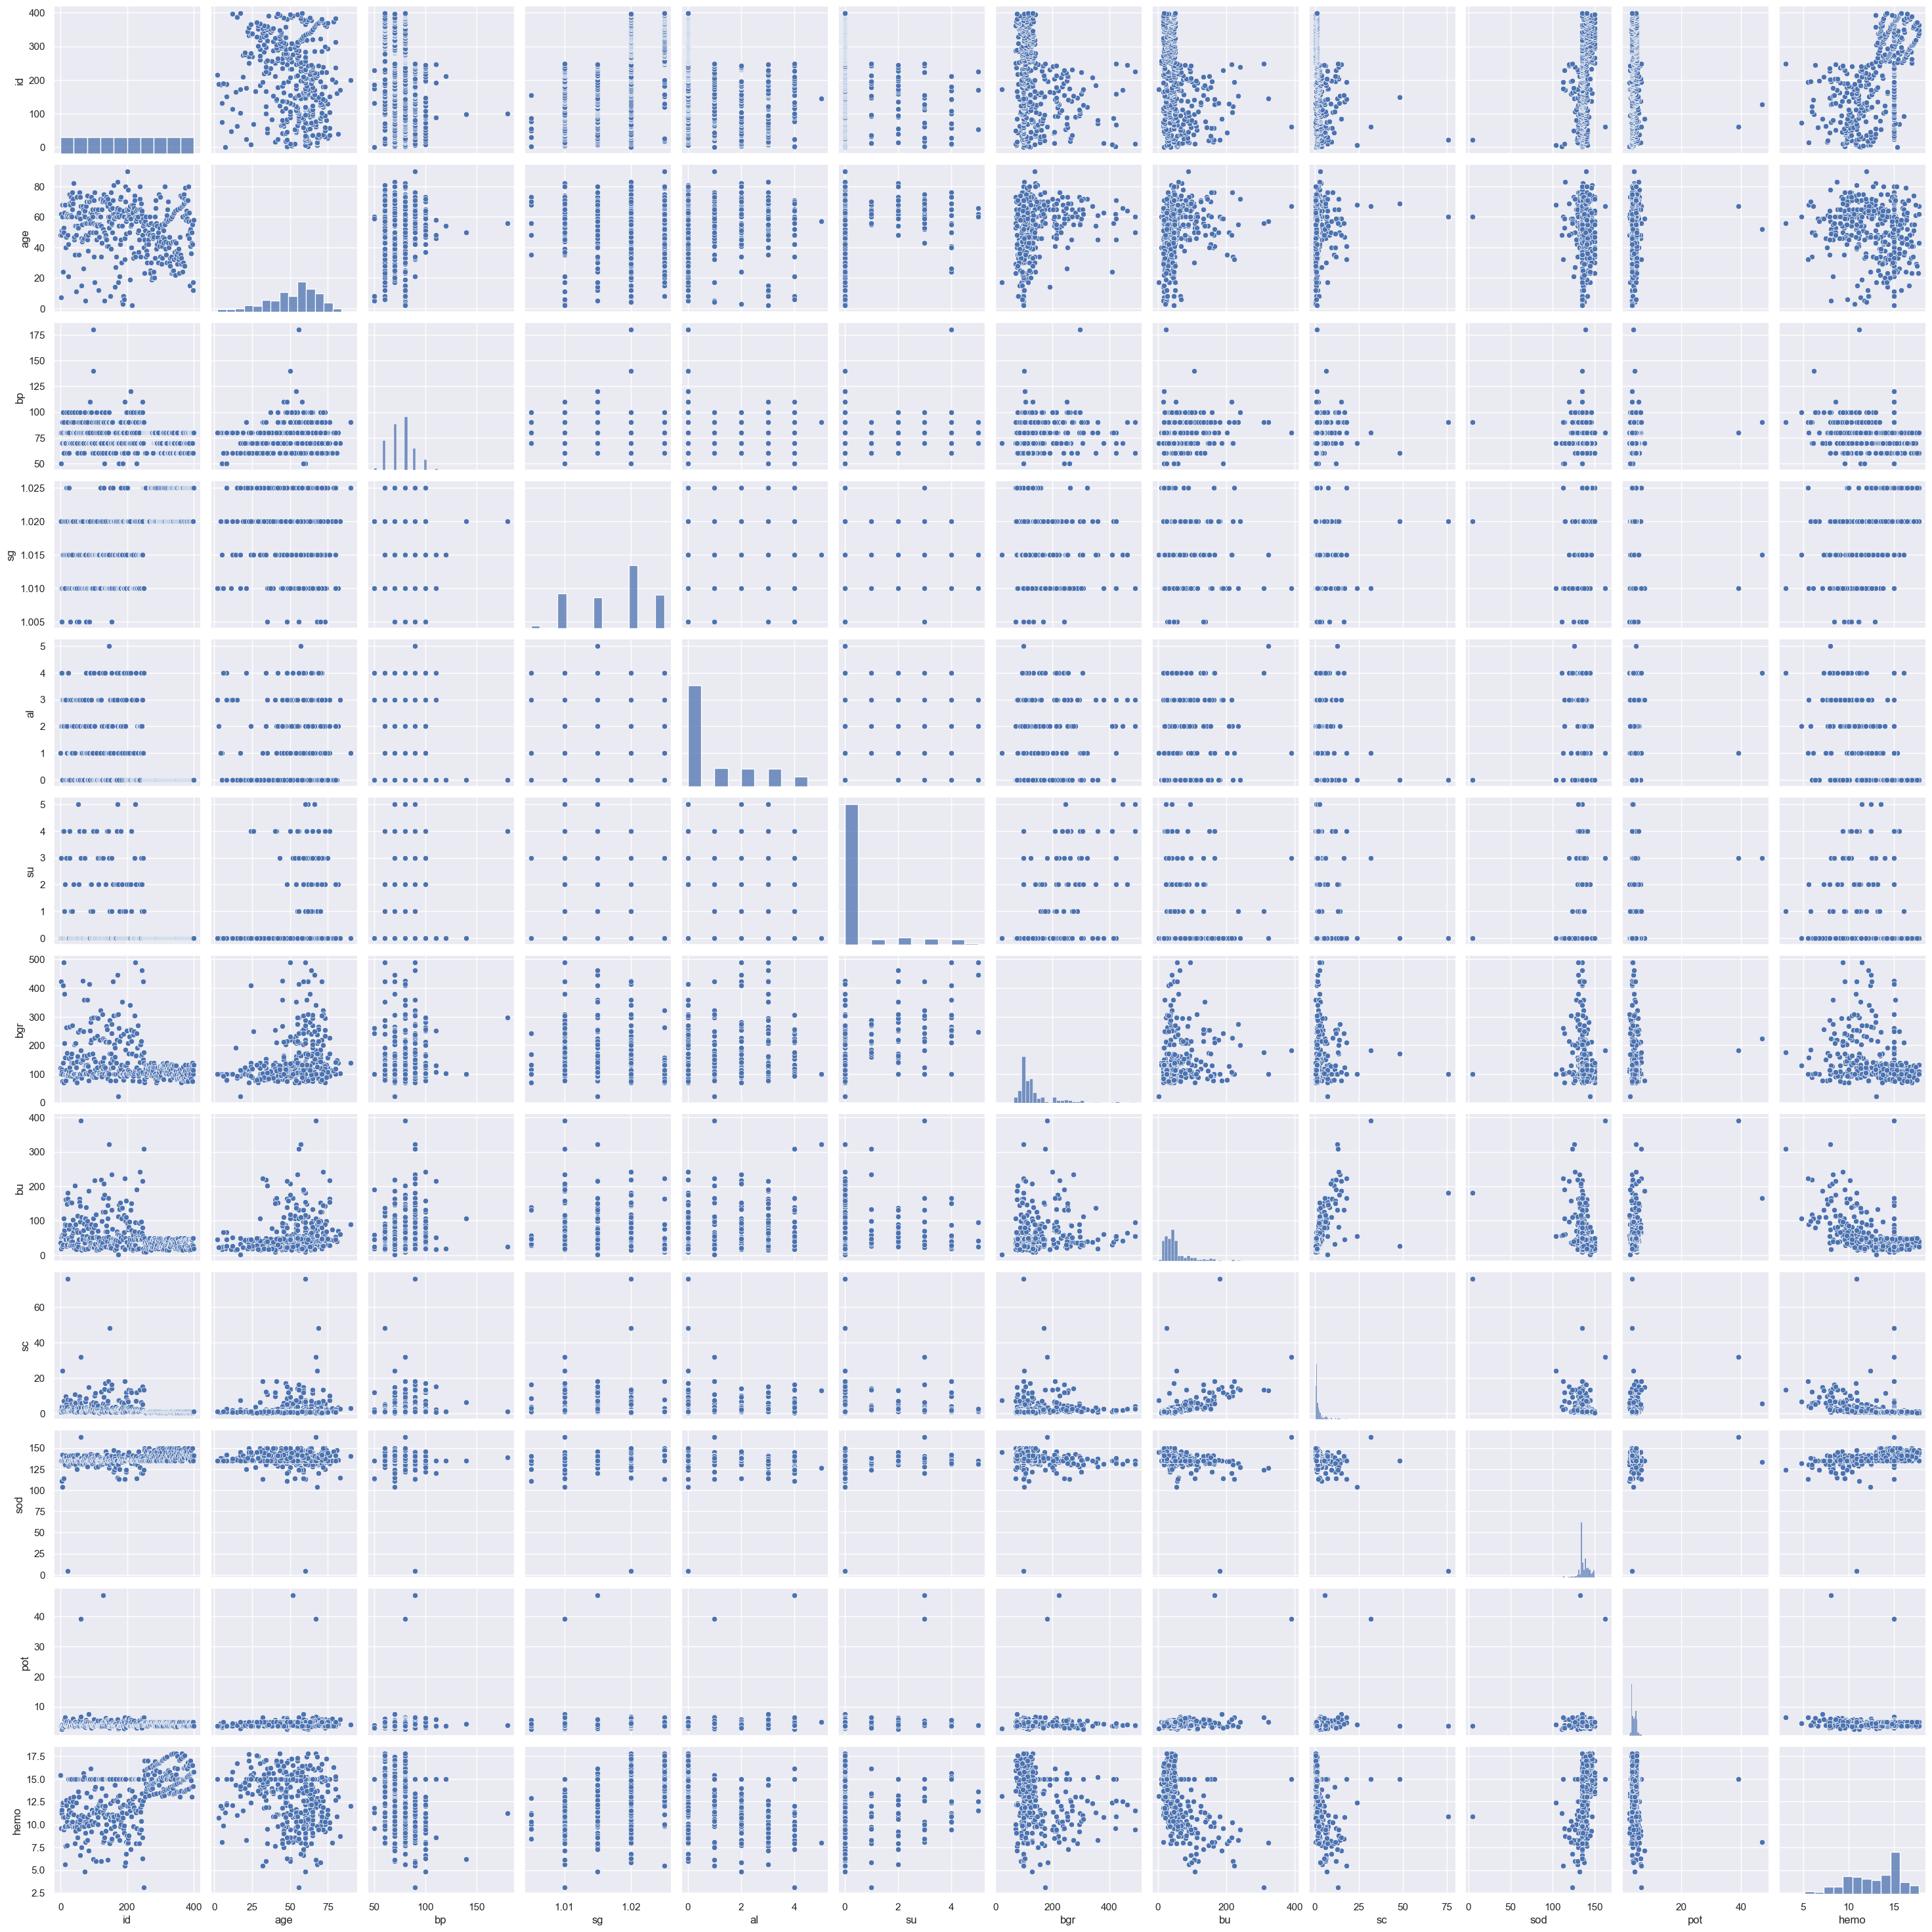

In [15]:
sns.pairplot(df_imputed)

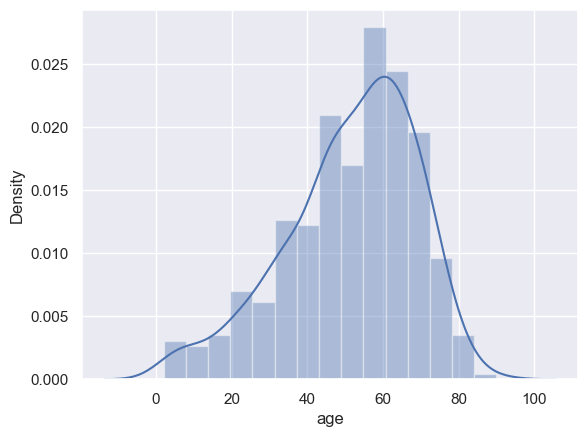

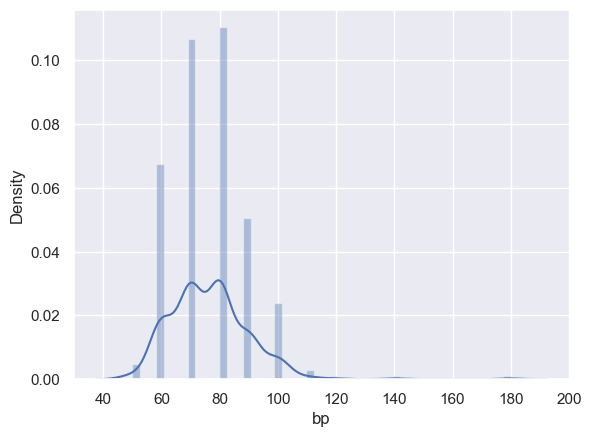

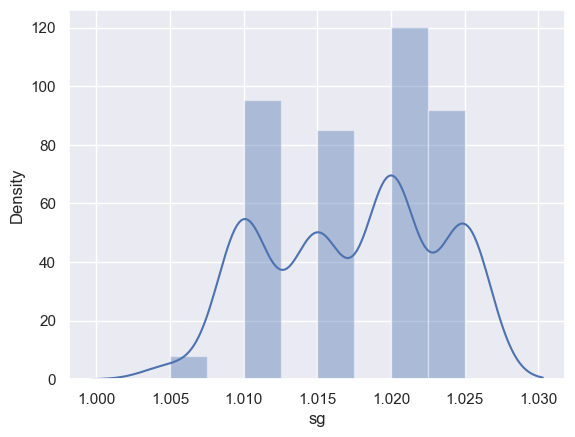

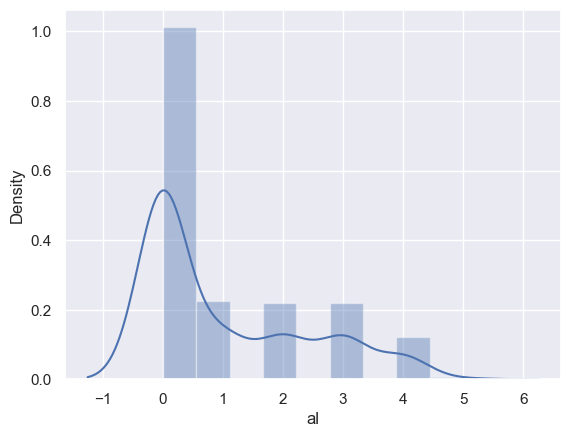

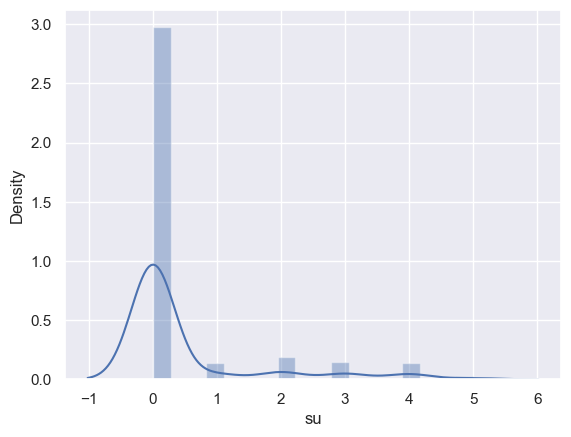

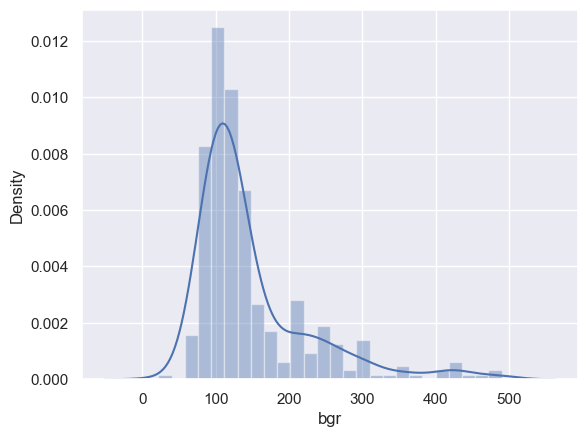

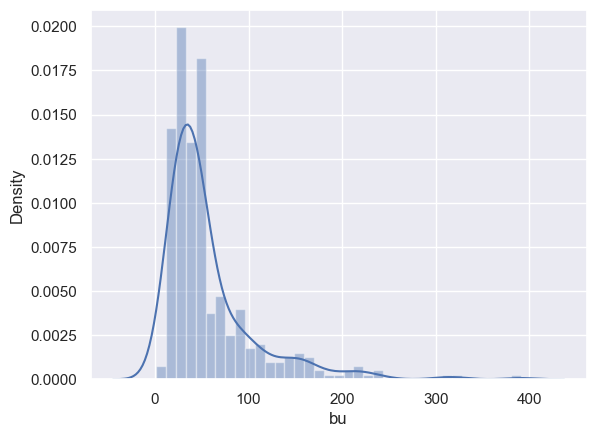

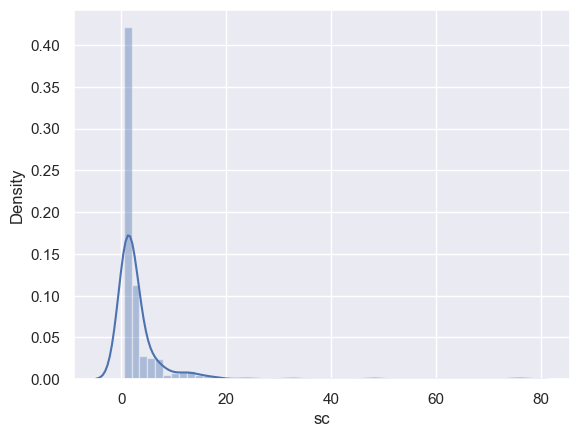

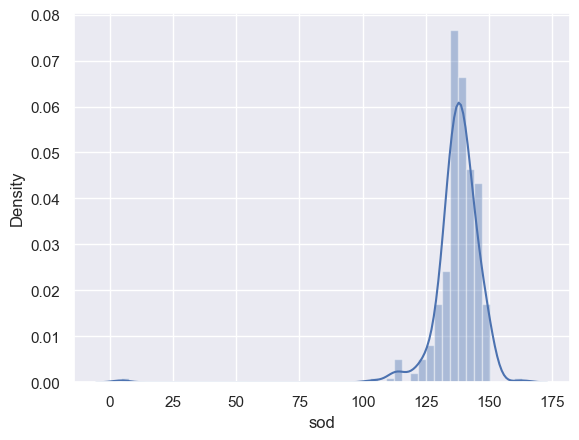

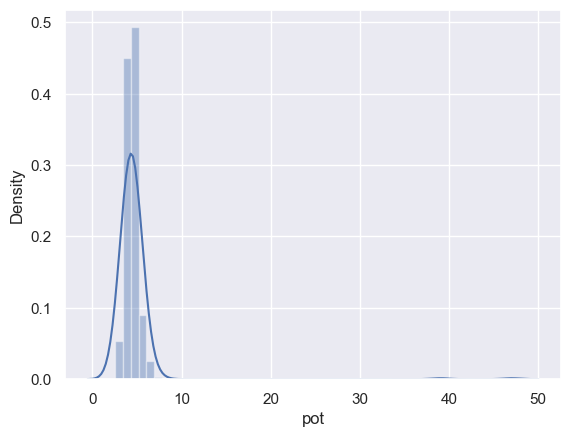

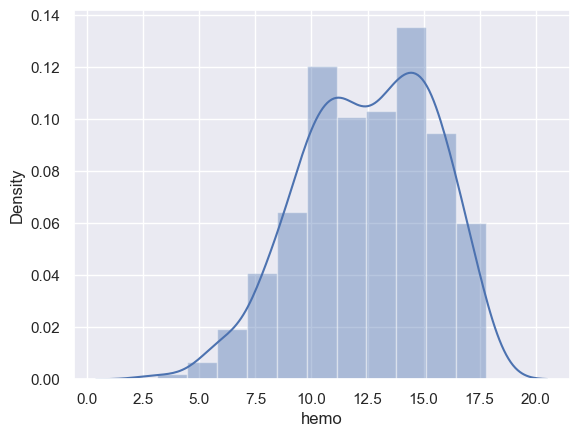

In [16]:
# Find the distribution of data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

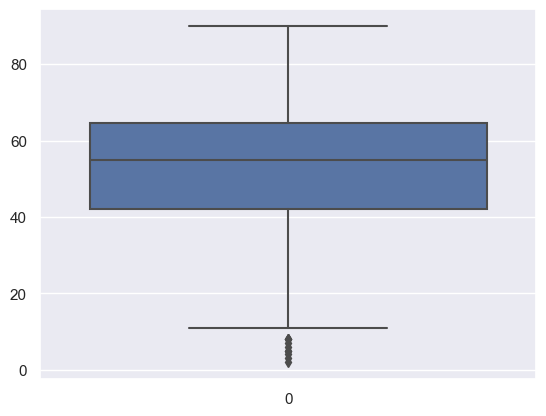

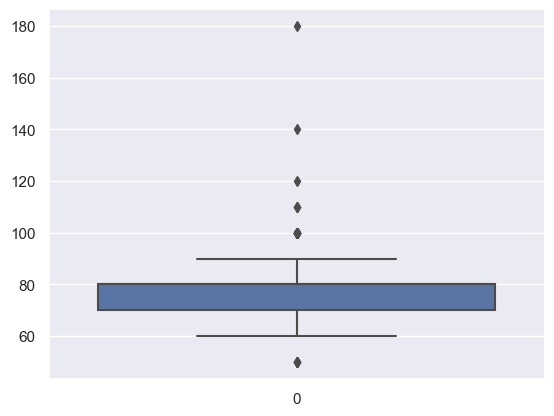

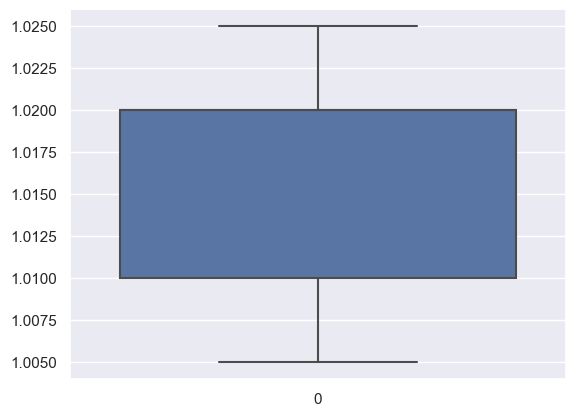

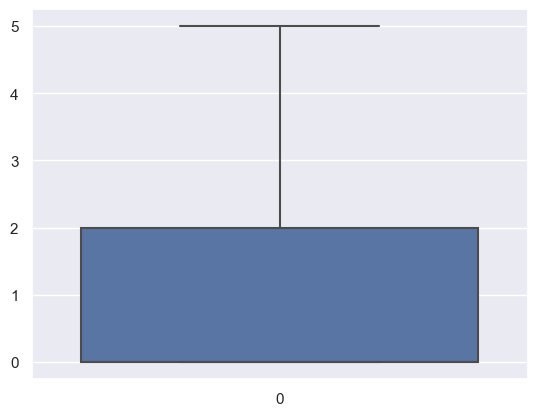

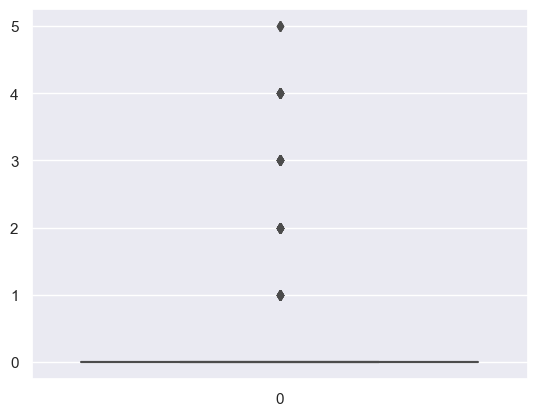

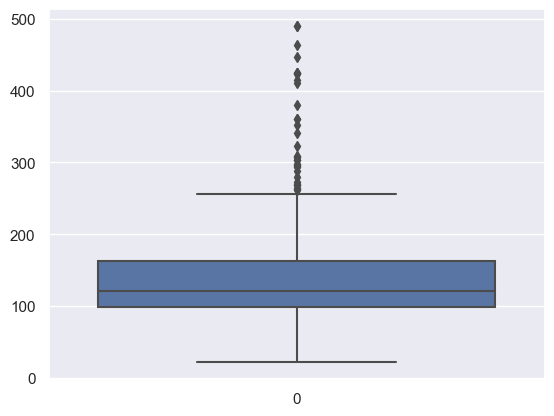

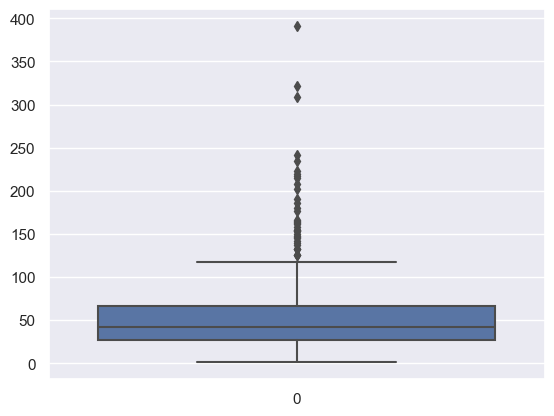

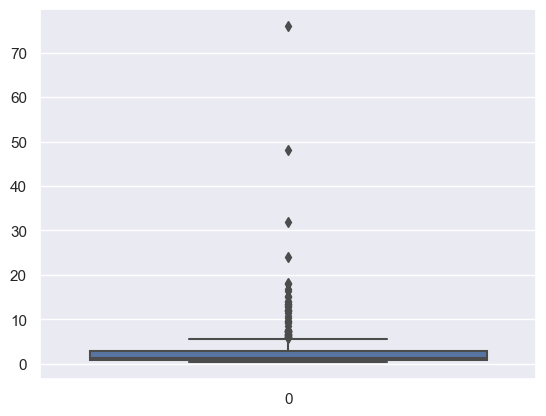

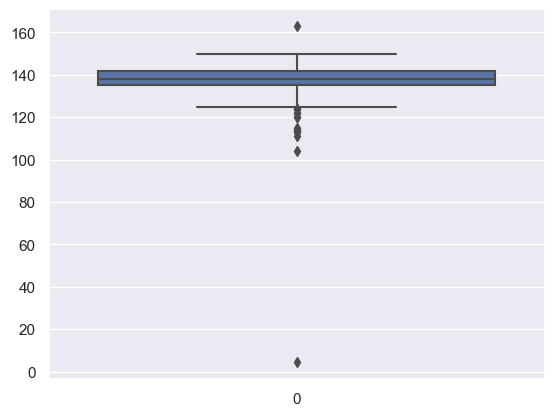

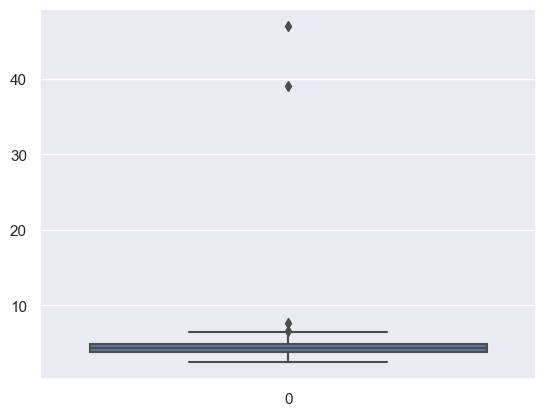

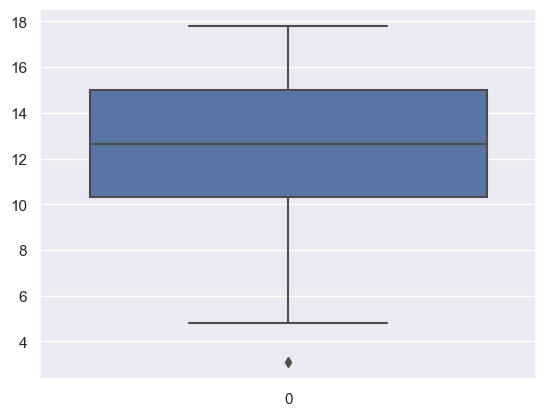

In [17]:
# Find and remove outliers of data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [18]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,32,72,34,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,26,56,34,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,19,70,34,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,20,62,19,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,23,68,27,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,35,62,30,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,42,72,44,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,37,61,36,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,39,67,41,0,0,0,0,0,0,1


<Axes: >

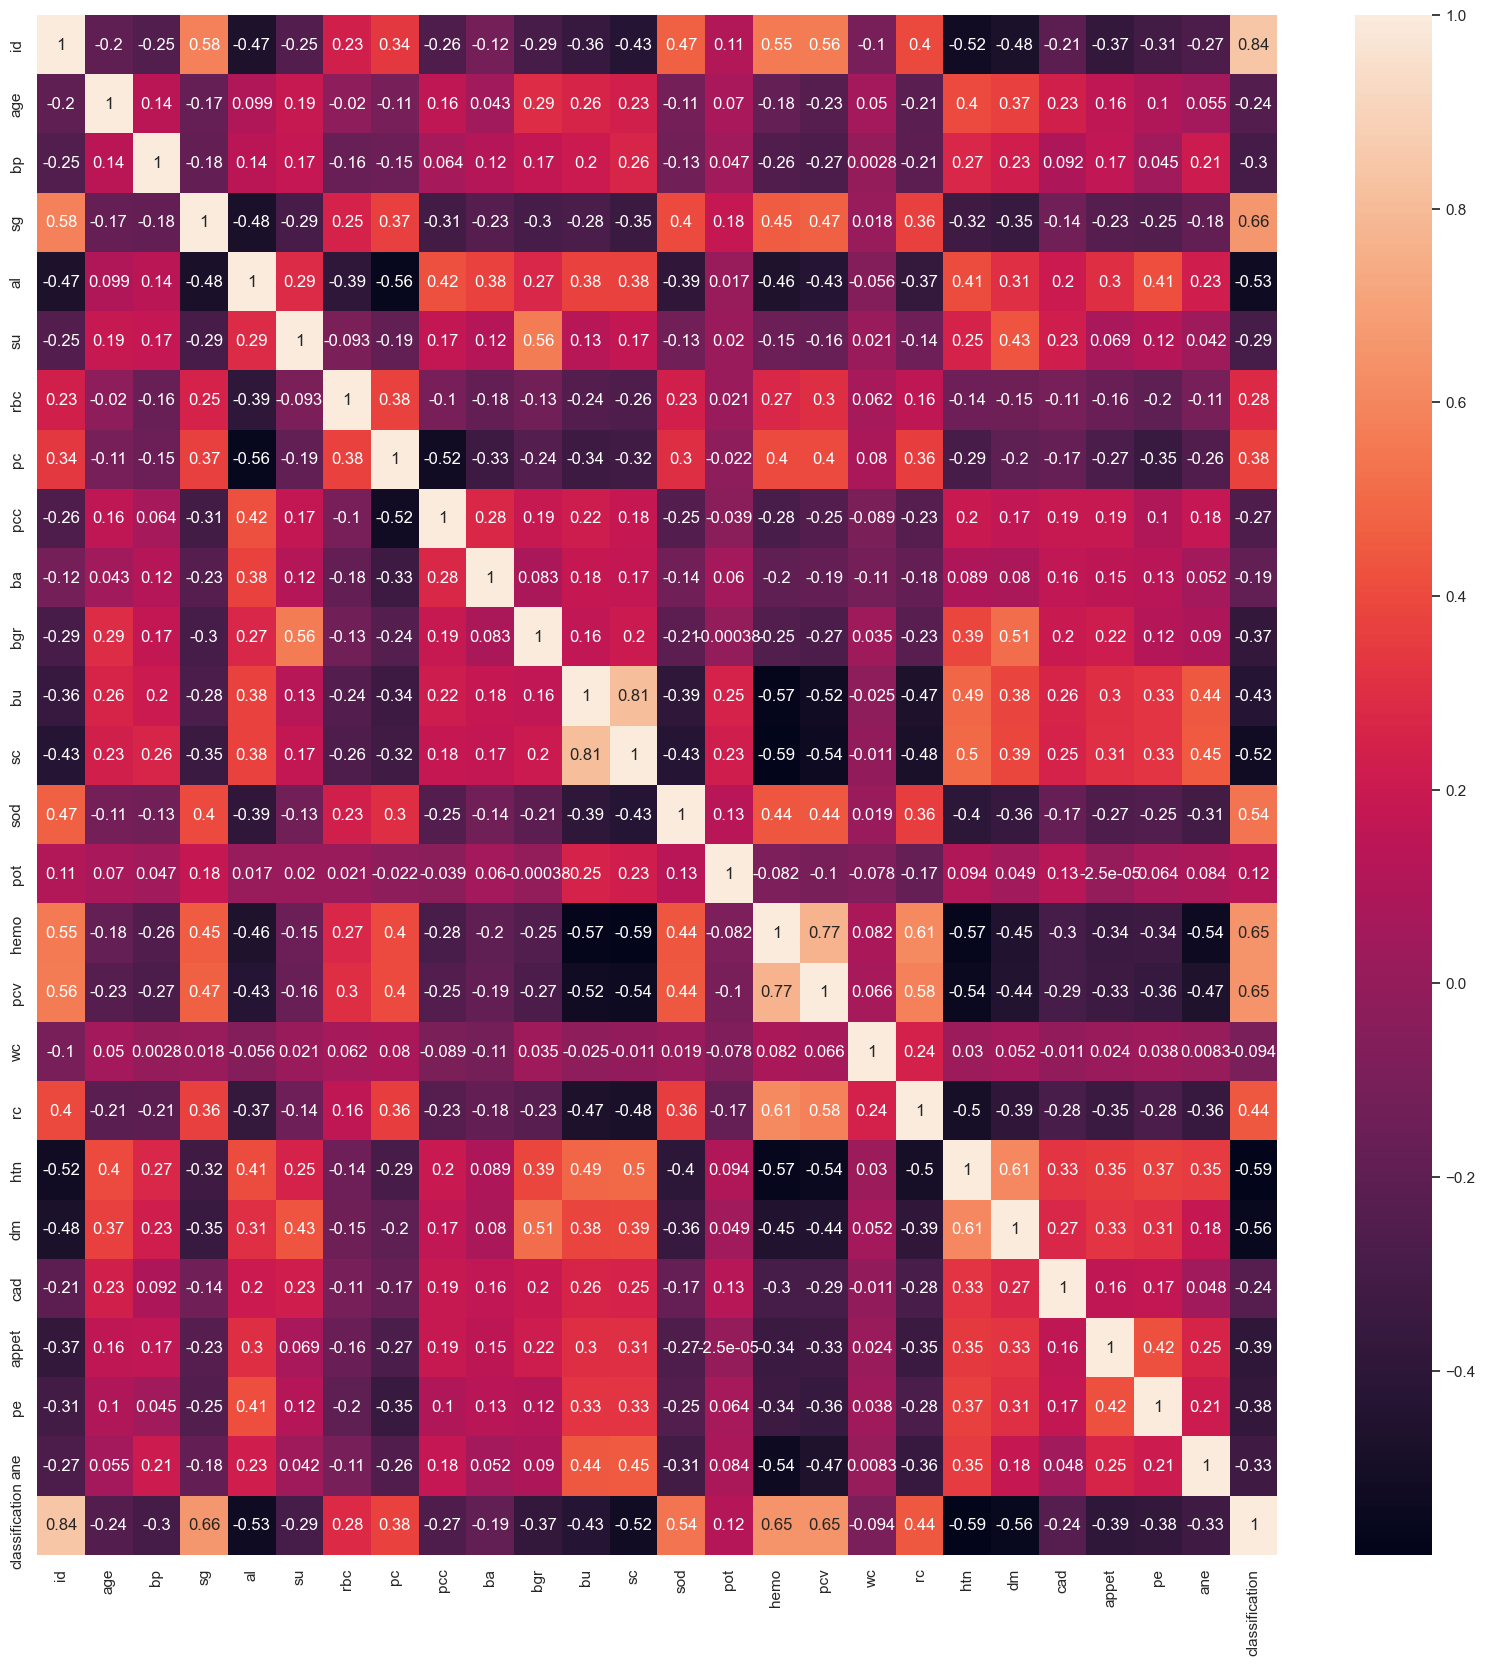

In [19]:
# Finding Correlations

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [20]:
# Lets make some final changes to the data 

# Seperate independent and dependent variables and drop the ID column
x=df_enco.drop(["id","classification"],axis=1)
y=df_enco["classification"]

In [21]:
# Lets detect the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [22]:
# Lets balance the labels

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [23]:
#Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. 
#The MinMaxScaler transforms features by scaling them to a given range.
#The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.
#Scale the features to between -1 and 1

# Scaling is important in the algorithms such as support vector machines (SVM) and k-nearest neighbors (KNN) where distance 
# between the data points is important.

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [46]:
# Applying PCA 

# The code below has .95 for the number of components parameter. 
# It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

# Thus we need 18 columns to keep 95% of the variance

(500, 24)
(500, 18)


In [51]:
sg = pd.DataFrame(X_PCA)
sg



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.705204,-1.613148,-0.481765,-0.079853,-0.139545,-0.151748,-0.163017,-0.067657,-0.733057,-0.404527,0.252716,-0.741321,0.118416,0.137986,0.219755,0.357077,-0.143459,0.077103
1,-0.861267,0.601186,-0.124285,-0.003682,-0.007586,-0.181925,0.193803,-0.296473,-0.440801,0.600693,-0.301376,-0.781536,0.641234,0.239158,-0.247849,-0.196093,-0.069772,1.261836
2,1.729429,-0.522653,0.400241,-0.103329,-0.118792,1.852663,1.738613,-0.947178,0.374208,0.321853,-1.057455,0.750266,-0.019566,0.237172,0.153703,0.078291,-0.264588,0.473104
3,3.294694,2.332425,1.086235,0.213205,-0.402493,0.945648,-1.055045,-0.822371,-1.258880,0.677104,-0.261219,-0.232215,-0.607739,0.169836,-0.437405,0.435287,-0.264743,0.230409
4,-0.565908,0.339089,-0.254131,0.066209,-0.223726,0.028968,0.297823,-0.175805,-0.456464,1.137497,0.041835,0.150808,0.001376,-0.271535,0.117345,-0.302568,-0.076344,0.463317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.453692,0.037754,0.131375,-0.003935,0.090044,-0.052507,-0.134405,-0.014001,0.126846,-0.317978,-0.201584,-0.306289,0.222324,0.038102,0.011276,-0.452911,0.022847,0.004868
496,-1.530489,0.069407,0.114184,-0.023239,0.150047,-0.068811,-0.091388,-0.019988,-0.016939,-0.287770,-0.087032,-0.376380,0.009786,0.123651,0.083122,0.149821,-0.109072,-0.059316
497,-1.239430,-0.066090,0.114133,-0.079079,-0.480097,0.013873,-0.082798,0.104994,0.236835,-0.009357,0.138483,0.165444,0.064437,0.070887,-0.083331,-0.140321,-0.162265,-0.101665
498,-1.210398,0.109444,0.037822,0.125111,0.240935,-0.018198,0.097375,-0.087518,-0.010230,-0.102809,-0.215341,-0.334949,0.289544,-0.079902,-0.338776,0.303689,0.503940,0.064146


In [25]:
# With PCA

#Now,split the dataset into training and testing sets keeping 20% of the data for testing.
#Split the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)

                       Method Used  Accuracy
0              Logistic Regression      0.98
1                     Decison Tree      1.00
2  Random Forest(information gain)      1.00
3           Random Forest(Entropy)      1.00
4                              SVM      0.99
5                              KNN      0.98
6                              gnb      0.99
7                              bnb      0.87
8                voting classifier      0.99
Axes(0.125,0.11;0.775x0.77)


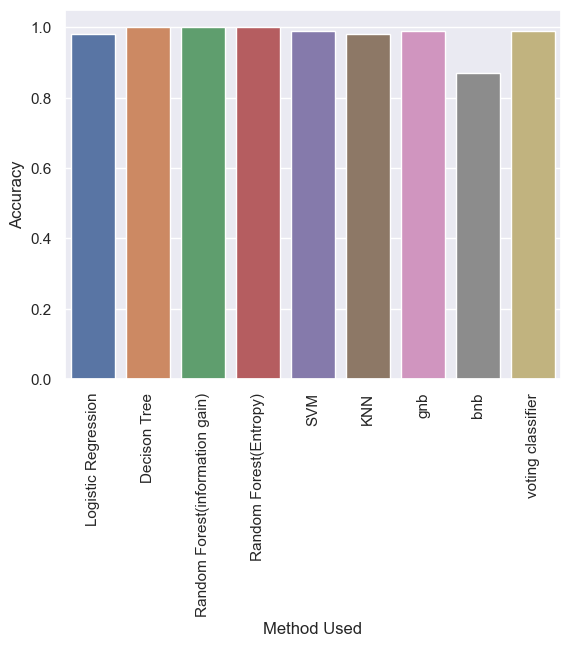

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

list_met=[]
list_accuracy=[]

# Applying all the algorithms

# Apply Logistic Regression
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train, y_train)
#Preciction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR= accuracy_score(y_test, y_pred)


# Apply Decison Tree
classifier2 = DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train, y_train)
#Preciction
y_pred2 = classifier2.predict(x_test)
#Accuracy
accuracy_DT= accuracy_score(y_test, y_pred2)

# Apply Random Forest criteria=information gain
classifier3 = RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train, y_train)
#Preciction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RFI= accuracy_score(y_test, y_pred3)

# Apply Random Forest criteria=entropy
classifier4 = RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train, y_train)
#Preciction
y_pred4 = classifier4.predict(x_test)
#Accuracy
accuracy_RFE= accuracy_score(y_test, y_pred4)

# similarly apply SVM
model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)
#Preciction
y_pred5 = model_svm.predict(x_test)
#Accuracy
accuracy_svc= accuracy_score(y_test, y_pred5)

# Apply KNN
model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(x_test)
#Accuracy
accuracy_SVM = accuracy_score(y_test, pred_knn3)

#Apply Gaussian Naive Bayes
gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
# Predicting Test Set
pred_gnb = gnb.predict(x_test)
#accuracy
accuracy_GNB = accuracy_score(y_test, pred_gnb)

#Apply Bernoulli Naive Bayes
model = BernoulliNB()
bnb=model.fit(x_train, y_train)
# Predicting Test Set
pred_bnb = model.predict(x_test)
#accuracy
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# Combining all the above using voting classifier
evc=VotingClassifier(estimators=[('lr', lr), ('rfi', rfi),('rfe', rfe), ('DT', dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                                 flatten_transform=True)

model_evc=evc.fit(x_train, y_train)
# Predicting Test Set
pred_evc = evc.predict(x_test)
#accuracy
accuracy_evc = accuracy_score(y_test, pred_gnb)

list1=['Logistic Regression','Decison Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']

list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy': list2})
print(df_Accuracy)

chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)



In [28]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
#from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix

# to plot ROC curve
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

----------------- Model Performance for  LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')  with PCA ----------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        52

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Confusion Matrix:
[[46  2]
 [ 0 52]]

------------------ROC FOR  Logistic Regression  +PCA ---------------------------


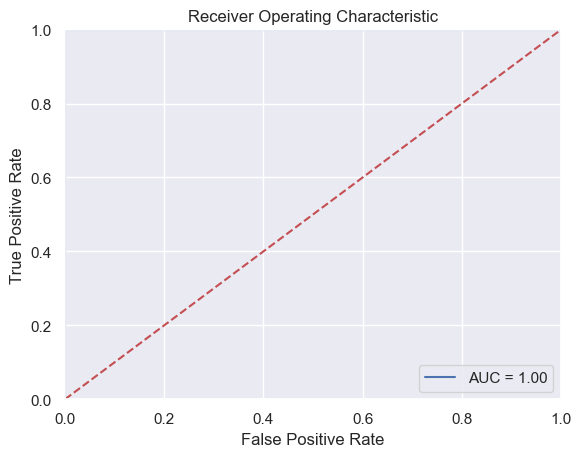


----------------- Model Performance for  DecisionTreeClassifier(random_state=14)  with PCA ----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
[[48  0]
 [ 0 52]]

------------------ROC FOR  Decison Tree  +PCA ---------------------------


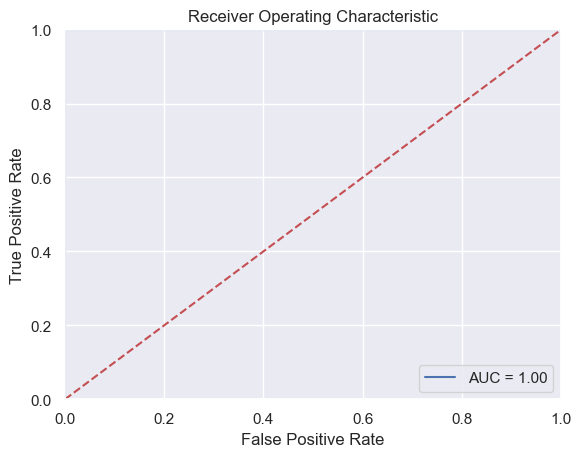


----------------- Model Performance for  RandomForestClassifier(random_state=14)  with PCA ----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
[[48  0]
 [ 0 52]]

------------------ROC FOR  Random Forest(information gain)  +PCA ---------------------------


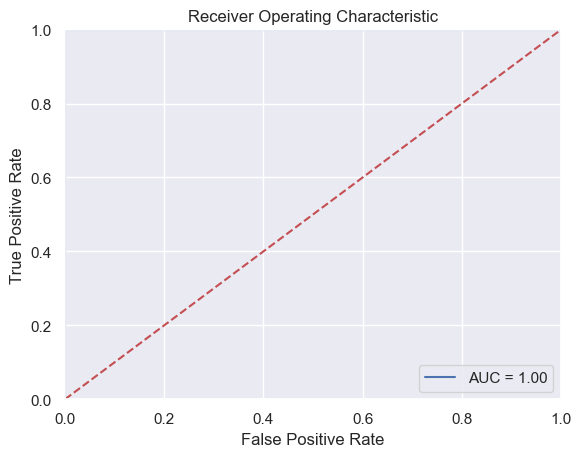


----------------- Model Performance for  RandomForestClassifier(criterion='entropy')  with PCA ----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
[[48  0]
 [ 0 52]]

------------------ROC FOR  Random Forest(Entropy)  +PCA ---------------------------


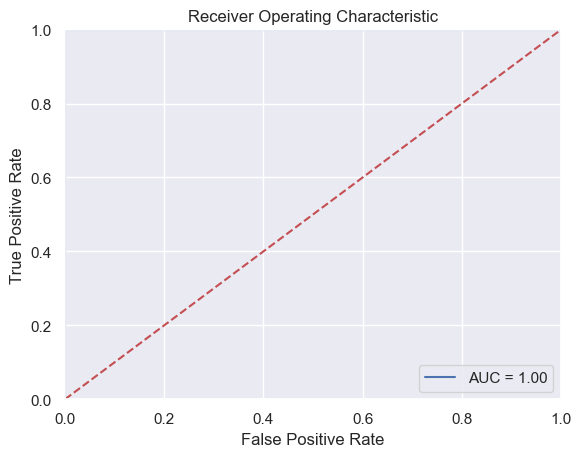


----------------- Model Performance for  SVC(cache_size=100)  with PCA ----------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Confusion Matrix:
[[47  1]
 [ 0 52]]

------------------ROC FOR  SVM  +PCA ---------------------------
roc not valid
----------------- Model Performance for  KNeighborsClassifier(n_neighbors=3)  with PCA ----------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        52

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Confusion Matrix:
[[46  2]
 [ 0 52]]

------

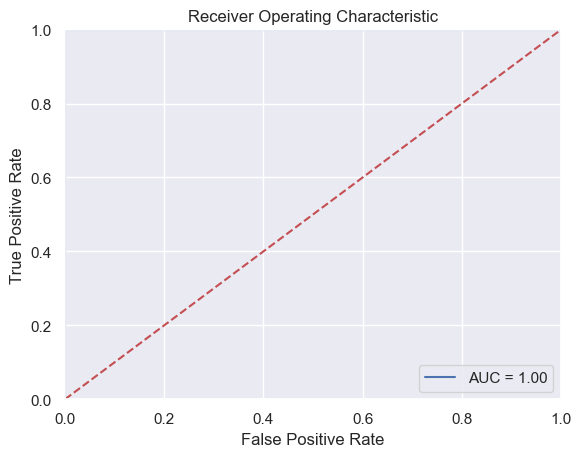


----------------- Model Performance for  GaussianNB()  with PCA ----------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Confusion Matrix:
[[47  1]
 [ 0 52]]

------------------ROC FOR  gnb  +PCA ---------------------------


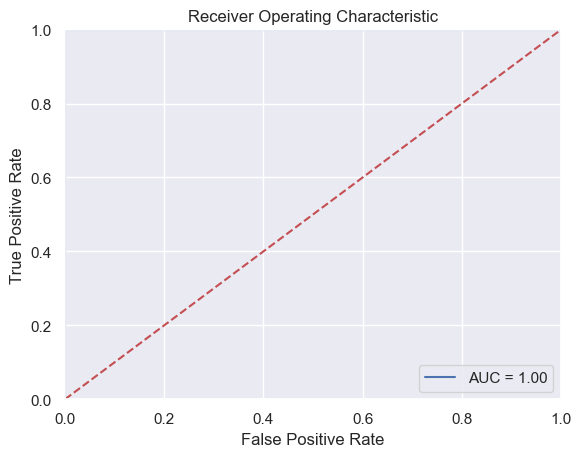


----------------- Model Performance for  BernoulliNB()  with PCA ----------

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.93      0.81      0.87        52

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100


Confusion Matrix:
[[45  3]
 [10 42]]

------------------ROC FOR  bnb  +PCA ---------------------------


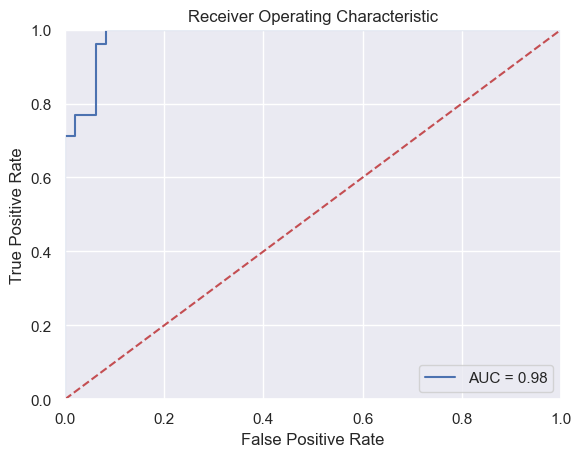

In [29]:
for i in range(0,len(list3)):
    try:
        print("----------------- Model Performance for ",list3[i]," with PCA ----------")
        print()
        print(classification_report(y_test, list3[i].predict(x_test)))
        print()
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, list3[i].predict(x_test)))
        print()
        print("------------------ROC FOR ",list1[i]," +PCA ---------------------------")
        plot_roc(list3[i], x_test, np.array(y_test))
        print()
    except:
        print("roc not valid")

Detailed classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.98      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[48  0]
 [ 1 51]]


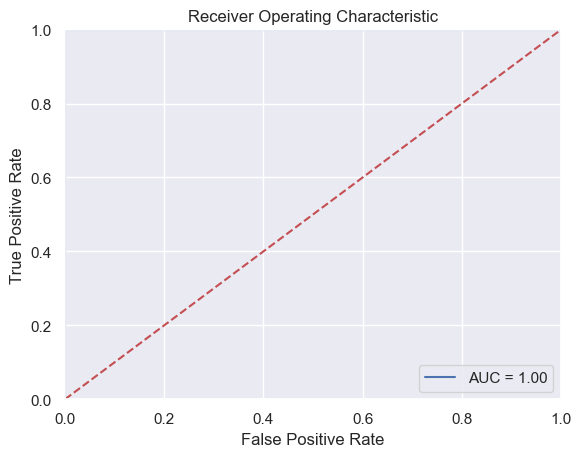

Best parameters:
{'class_weight': None, 'max_depth': 5, 'n_estimators': 8, 'random_state': 42}


In [30]:
# Grid Search CV

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(criterion='entropy'), tuned_parameters, cv=10,scoring='f1')
clf.fit(x_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
plot_roc(clf, x_test, np.array(y_test))

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.98      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[48  0]
 [ 1 51]]
Accuracy: 0.990000


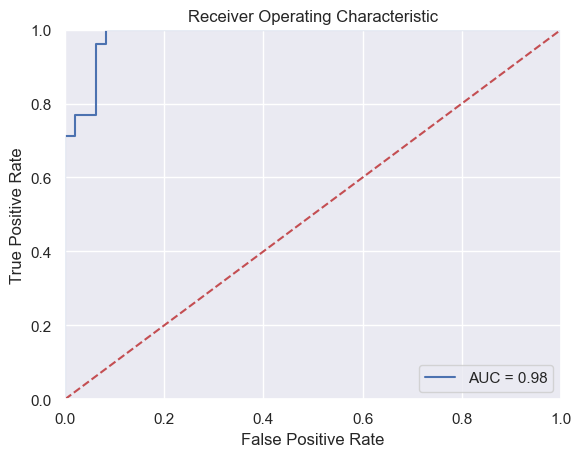

In [31]:
lr_pred = clf_best.predict(x_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_true, lr_pred))
# Determine the false positive and true positive rates
plot_roc(list3[i], x_test, np.array(y_test))
 


In [ ]:
# We will now follow the same steps with LDA and make comparisons

                       Method Used  Accuracy
0              Logistic Regression      0.98
1                     Decison Tree      1.00
2  Random Forest(information gain)      1.00
3           Random Forest(Entropy)      1.00
4                              SVM      0.99
5                              KNN      0.98
6                              gnb      0.99
7                              bnb      0.87
8                voting classifier      0.99
Axes(0.125,0.11;0.775x0.77)


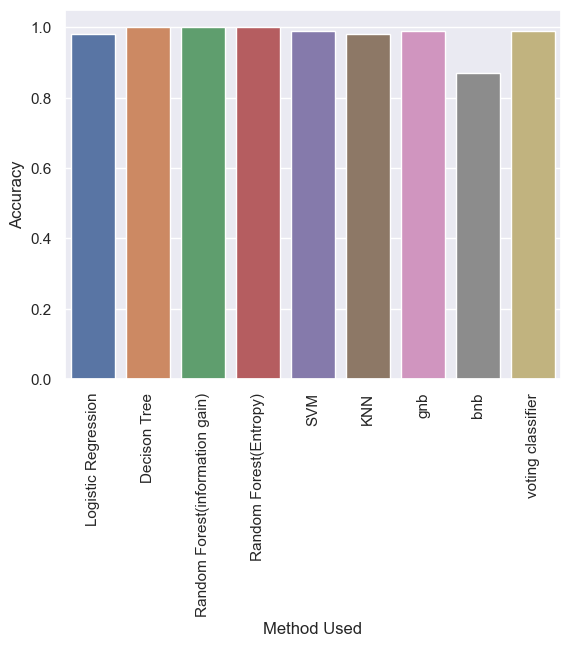

In [32]:
list_met=[]
list_accuracy=[]

# Applying all the algorithms

# Apply Logistic Regression
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train, y_train)
#Preciction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR= accuracy_score(y_test, y_pred)


# Apply Decison Tree
classifier2 = DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train, y_train)
#Preciction
y_pred2 = classifier2.predict(x_test)
#Accuracy
accuracy_DT= accuracy_score(y_test, y_pred2)

# Apply Random Forest criteria=information gain
classifier3 = RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train, y_train)
#Preciction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RFI= accuracy_score(y_test, y_pred3)

# Apply Random Forest criteria=entropy
classifier4 = RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train, y_train)
#Preciction
y_pred4 = classifier4.predict(x_test)
#Accuracy
accuracy_RFE= accuracy_score(y_test, y_pred4)

# similarly apply SVM
model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)
#Preciction
y_pred5 = model_svm.predict(x_test)
#Accuracy
accuracy_svc= accuracy_score(y_test, y_pred5)

# Apply KNN
model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(x_test)
#Accuracy
accuracy_SVM = accuracy_score(y_test, pred_knn3)

#Apply Gaussian Naive Bayes
gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
# Predicting Test Set
pred_gnb = gnb.predict(x_test)
#accuracy
accuracy_GNB = accuracy_score(y_test, pred_gnb)

#Apply Bernoulli Naive Bayes
model = BernoulliNB()
bnb=model.fit(x_train, y_train)
# Predicting Test Set
pred_bnb = model.predict(x_test)
#accuracy
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# Combining all the above using voting classifier
evc=VotingClassifier(estimators=[('lr', lr), ('rfi', rfi),('rfe', rfe), ('DT', dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                                 flatten_transform=True)

model_evc=evc.fit(x_train, y_train)
# Predicting Test Set
pred_evc = evc.predict(x_test)
#accuracy
accuracy_evc = accuracy_score(y_test, pred_gnb)

list1=['Logistic Regression','Decison Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']

list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy': list2})
print(df_Accuracy)

chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)



----------------- Model Performance for  LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')  with LDA ----------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        52

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Confusion Matrix:
[[46  2]
 [ 0 52]]

------------------ROC FOR  Logistic Regression  +LDA ---------------------------


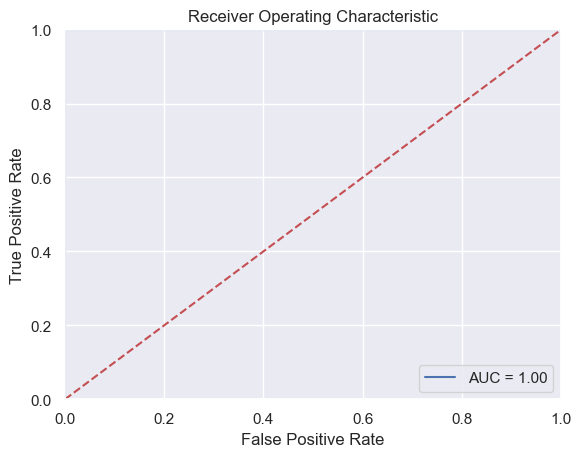


----------------- Model Performance for  DecisionTreeClassifier(random_state=14)  with LDA ----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
[[48  0]
 [ 0 52]]

------------------ROC FOR  Decison Tree  +LDA ---------------------------


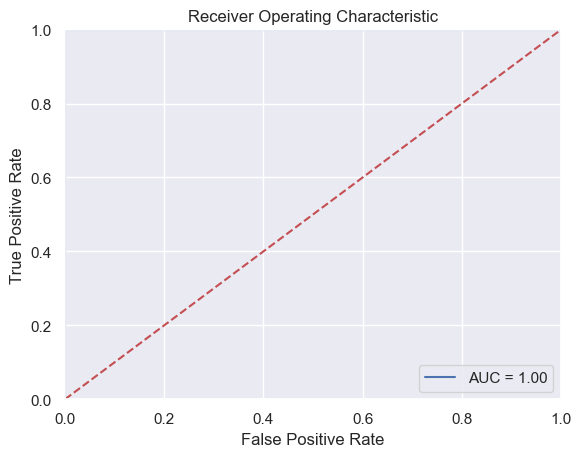


----------------- Model Performance for  RandomForestClassifier(random_state=14)  with LDA ----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
[[48  0]
 [ 0 52]]

------------------ROC FOR  Random Forest(information gain)  +LDA ---------------------------


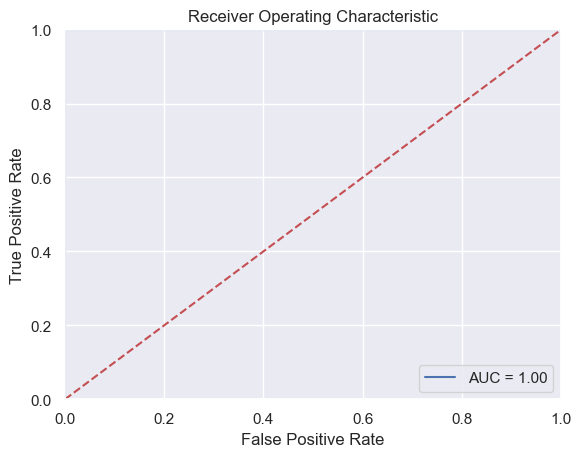


----------------- Model Performance for  RandomForestClassifier(criterion='entropy')  with LDA ----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
[[48  0]
 [ 0 52]]

------------------ROC FOR  Random Forest(Entropy)  +LDA ---------------------------


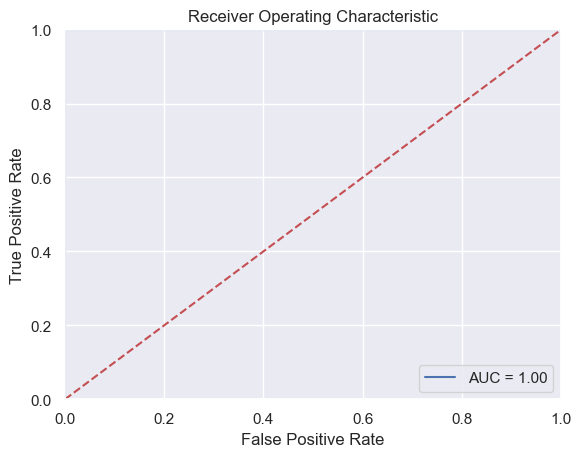


----------------- Model Performance for  SVC(cache_size=100)  with LDA ----------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Confusion Matrix:
[[47  1]
 [ 0 52]]

------------------ROC FOR  SVM  +LDA ---------------------------
roc not valid
----------------- Model Performance for  KNeighborsClassifier(n_neighbors=3)  with LDA ----------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        52

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Confusion Matrix:
[[46  2]
 [ 0 52]]

------

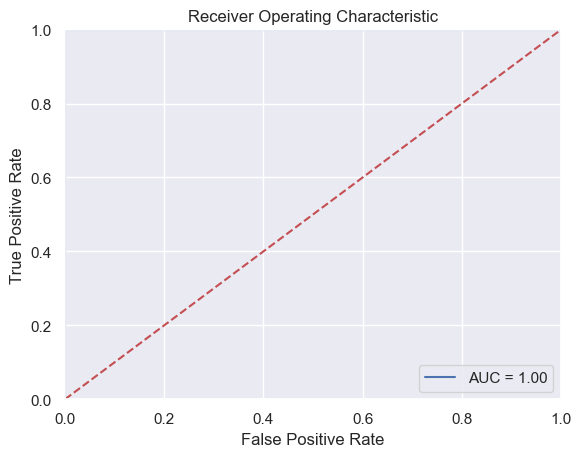


----------------- Model Performance for  GaussianNB()  with LDA ----------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        52

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Confusion Matrix:
[[47  1]
 [ 0 52]]

------------------ROC FOR  gnb  +LDA ---------------------------


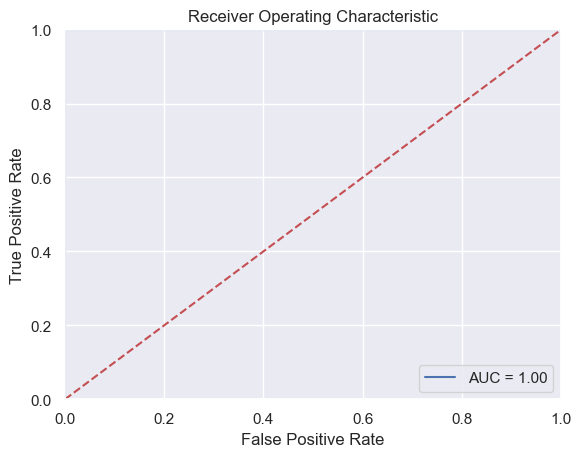


----------------- Model Performance for  BernoulliNB()  with LDA ----------

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.93      0.81      0.87        52

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100


Confusion Matrix:
[[45  3]
 [10 42]]

------------------ROC FOR  bnb  +LDA ---------------------------


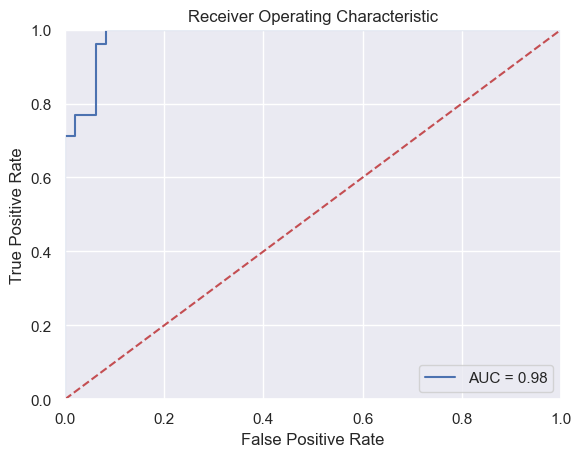

In [33]:
for i in range(0,len(list3)):
    try:
        print("----------------- Model Performance for ",list3[i]," with LDA ----------")
        print()
        print(classification_report(y_test, list3[i].predict(x_test)))
        print()
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, list3[i].predict(x_test)))
        print()
        print("------------------ROC FOR ",list1[i]," +LDA ---------------------------")
        plot_roc(list3[i], x_test, np.array(y_test))
        print()
    except:
        print("roc not valid")

In [40]:
# CONCLUSION

In [ ]:
# According to the analysis the best performing algorithms are :-

# 1. Random Forest
# 2. Dicision Tree

# ---> they have a high accuracy score of 1.00
# ---> they have very low rate of false positive and true negetive

In [ ]:
# For creating web page

In [4]:
df = pd.read_csv('data.csv')[['age','bp','pc','htn','dm','appet','pe','classification']]
df

,age,bp,pc,htn,dm,appet,pe,classification
0,48.0,80.0,normal,yes,yes,good,no,ckd
1,7.0,50.0,normal,no,no,good,no,ckd
2,62.0,80.0,normal,no,yes,poor,no,ckd
3,48.0,70.0,abnormal,yes,no,poor,yes,ckd
4,51.0,80.0,normal,no,no,good,no,ckd
...,...,...,...,...,...,...,...,...
395,55.0,80.0,normal,no,no,good,no,notckd
396,42.0,70.0,normal,no,no,good,no,notckd
397,12.0,80.0,normal,no,no,good,no,notckd
398,17.0,60.0,normal,no,no,good,no,notckd


In [5]:
df.isnull().sum()

age                9
bp                12
pc                65
htn                2
dm                 2
appet              1
pe                 1
classification     0
dtype: int64

In [6]:
# Impuing Null values

from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,age,bp,pc,htn,dm,appet,pe,classification
0,48.0,80.0,normal,yes,yes,good,no,ckd
1,7.0,50.0,normal,no,no,good,no,ckd
2,62.0,80.0,normal,no,yes,poor,no,ckd
3,48.0,70.0,abnormal,yes,no,poor,yes,ckd
4,51.0,80.0,normal,no,no,good,no,ckd
...,...,...,...,...,...,...,...,...
395,55.0,80.0,normal,no,no,good,no,notckd
396,42.0,70.0,normal,no,no,good,no,notckd
397,12.0,80.0,normal,no,no,good,no,notckd
398,17.0,60.0,normal,no,no,good,no,notckd


In [7]:
df_imputed.isnull().sum()


age               0
bp                0
pc                0
htn               0
dm                0
appet             0
pe                0
classification    0
dtype: int64

In [8]:
df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=="ckd\t"  else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=="\tno"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=="\tyes"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x==' yes'  else x)



In [9]:
from sklearn import preprocessing

df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,age,bp,pc,htn,dm,appet,pe,classification
0,40,3,1,1,1,0,0,0
1,5,0,1,0,0,0,0,0
2,54,3,1,0,1,1,0,0
3,40,2,0,1,0,1,1,0
4,43,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
395,47,3,1,0,0,0,0,1
396,34,2,1,0,0,0,0,1
397,8,3,1,0,0,0,0,1
398,11,1,1,0,0,0,0,1


In [10]:
# Lets make some final changes to the data 

# Seperate independent and dependent variables and drop the ID column
x=df_enco.drop(["classification"],axis=1)
y=df_enco["classification"]

In [11]:
# Lets detect the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [12]:
# Lets balance the labels

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [13]:
#Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. 
#The MinMaxScaler transforms features by scaling them to a given range.
#The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.
#Scale the features to between -1 and 1

# Scaling is important in the algorithms such as support vector machines (SVM) and k-nearest neighbors (KNN) where distance 
# between the data points is important.

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [41]:
#Now,split the dataset into training and testing sets keeping 20% of the data for testing.
#Split the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [42]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [43]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_test)
accuracy_score(y_test,pred_cv)

0.95

In [44]:
# we got 95% accuracy score

In [45]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [46]:
df_imputed.columns

Index(['age', 'bp', 'pc', 'htn', 'dm', 'appet', 'pe', 'classification'], dtype='object')

In [51]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache_data()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(age, bp, pc, htn, appet, dm, pe):   
 
    # Pre-processing user input    
    if htn == "no":
        htn = 0
    else:
        htn = 1
 
    if dm == "no":
        dm = 0
    else:
        dm = 1
    if appet == "good":
        appet = 0
    else:
        appet = 1
    if pc == "normal":
        pc = 1
    else:
        pc = 0
    if pe == "yes":
        pe = 1
    else:
        pe = 0
 
      
    # Making predictions 
    prediction = classifier.predict( 
        [[age, bp, pc, htn, appet, dm, pe]])
     
    if prediction == 0:
        pred = 'Kidney Disease not detected'
    else:
        pred = 'Kidny Disease found'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:cyan;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Kidney Disease Prediction</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    htn = st.selectbox('Hypertension',("no","yes"))
    dm = st.selectbox('Diabetes Mellitus',("no","yes")) 
    age = st.number_input("Age") 
    bp = st.number_input("BP") 
    pc = st.selectbox("Pus cell",("normal","abnormal"))
    pe = st.selectbox("Pedal edema",("yes","no"))
    appet = st.selectbox("APPET",("good","poor"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(age, bp, pc, htn, appet, dm, pe) 
        st.success('Report Results: {}'.format(result))
        
     
if __name__=='__main__': 
    main()

Overwriting app.py
